
# 📊 **Airbnb Hotel Booking Analysis**



# **Problem Statement**

Short-term rentals have become a major part of urban lodging. Using the Airbnb Open Data (NYC) file, this project aims to understand market patterns and host/guest dynamics that influence listing availability, pricing, and review outcomes. By cleaning and exploring the dataset, we will quantify how factors such as neighbourhood group, room type, construction year, host identity verification, and host portfolio size relate to price, ratings, and availability. The goal is to produce clear insights and visuals that can guide guests, hosts, and city stakeholders in making data-informed decisions.

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
df.columns = [c.strip().lower() for c in df.columns]
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (102599, 26)


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Light cleaning

In [6]:

# Fix common typos in neighborhood group names (expand if you spot more)
df["neighbourhood group"] = df["neighbourhood group"].replace({
    "brookln": "Brooklyn",
    "manhatan": "Manhattan",
})

# Ensure numeric columns are numeric
num_cols = ["price","construction year","calculated host listings count",
            "review rate number","service fee","availability 365"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df.head(3)


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


##  Room types present + Count bar chart

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


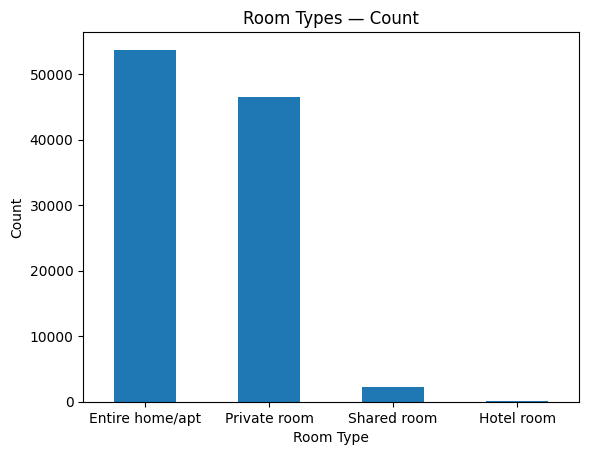

In [7]:

room_counts = df["room type"].value_counts(dropna=True)
print(room_counts)

plt.figure()
room_counts.plot(kind="bar")
plt.title("Room Types — Count")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


##  Neighborhood group with most listings (table + bar chart)

neighbourhood group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: listing_count, dtype: int64


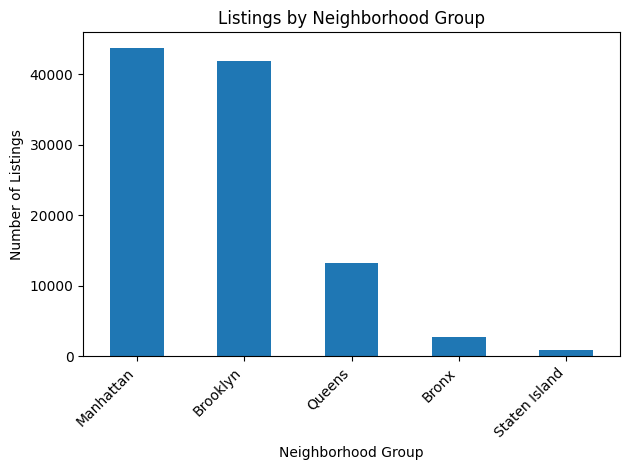


Winner: Manhattan with 43793 listings


In [8]:

ng_counts = (df.groupby("neighbourhood group")["id"]
               .count()
               .sort_values(ascending=False)
               .rename("listing_count"))
print(ng_counts)

plt.figure()
ng_counts.plot(kind="bar")
plt.title("Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nWinner:", ng_counts.index[0], "with", int(ng_counts.iloc[0]), "listings")


##  Highest average price by neighborhood group (table + bar chart)

neighbourhood group
Queens           630.21
Bronx            627.77
Brooklyn         626.56
Staten Island    624.49
Manhattan        622.44
Name: price, dtype: float64


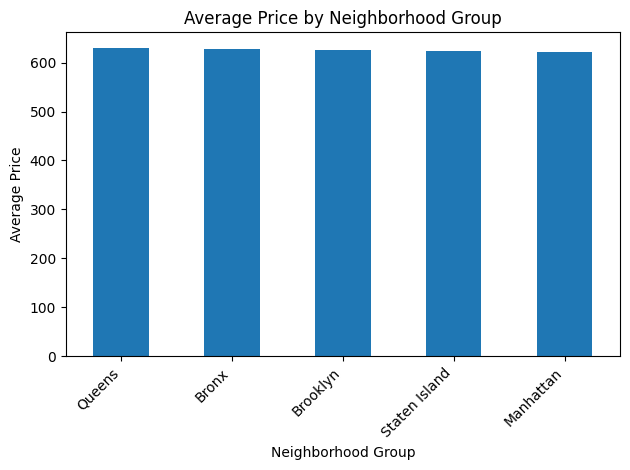

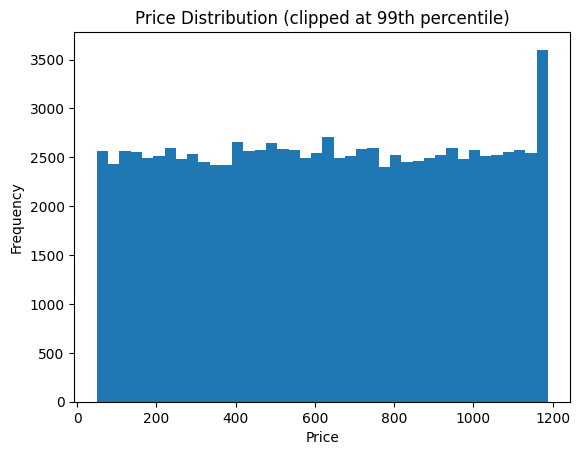

In [9]:

avg_price = (df.groupby("neighbourhood group")["price"]
               .mean()
               .round(2)
               .sort_values(ascending=False))
print(avg_price)

plt.figure()
avg_price.plot(kind="bar")
plt.title("Average Price by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# BONUS: Distribution of prices (histogram)
plt.figure()
df["price"].dropna().clip(upper=df["price"].quantile(0.99)).plot(kind="hist", bins=40)
plt.title("Price Distribution (clipped at 99th percentile)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


##  Construction year vs price (scatter)

Correlation: -0.004


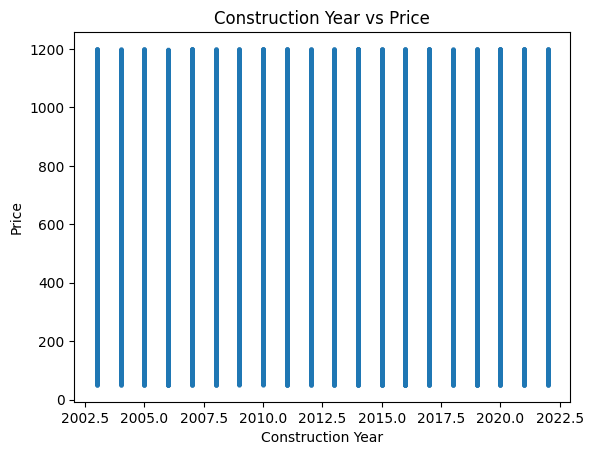

In [10]:

small = df[["construction year","price"]].dropna()
corr = small["construction year"].corr(small["price"])
print("Correlation:", round(corr, 3))

plt.figure()
plt.scatter(small["construction year"], small["price"], s=5, alpha=0.3)
plt.title("Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()


##  Top 10 hosts by listings (table + bar chart)

,host id,host_name,max_listings
7180,6866703084,Blueground,332.0
47037,45153317531,Blueground,332.0
3359,3231719861,Blueground,332.0
75068,72619494405,Blueground,332.0
64399,62221516723,Blueground,332.0
83611,80832323346,Blueground,332.0
86661,83842788941,Blueground,332.0
29226,28199312869,Blueground,332.0
55405,53394556356,Blueground,332.0
86237,83412943157,Blueground,332.0


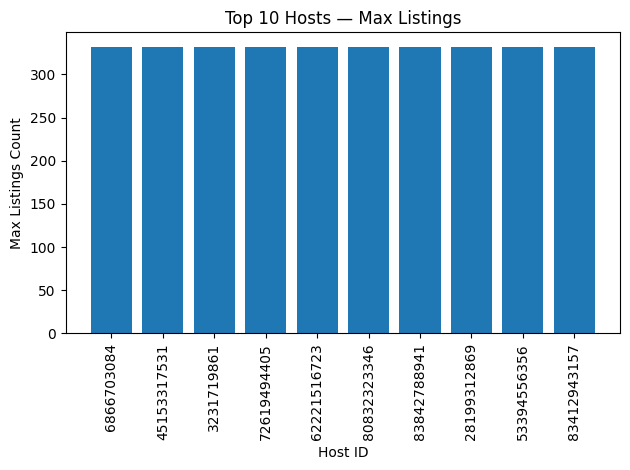

In [11]:

top_hosts = (df.groupby("host id")
               .agg(host_name=("host name","first"),
                    max_listings=("calculated host listings count","max"))
               .reset_index()
               .sort_values("max_listings", ascending=False)
               .head(10))

display(top_hosts)

plt.figure()
plt.bar(top_hosts["host id"].astype(str), top_hosts["max_listings"])
plt.title("Top 10 Hosts — Max Listings")
plt.xlabel("Host ID")
plt.ylabel("Max Listings Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##  Verified hosts vs ratings (table + small bar chart)

,host_identity_verified,count,positive_share,avg_stars
0,unconfirmed,51029,22.63,3.27
1,verified,50969,23.07,3.29


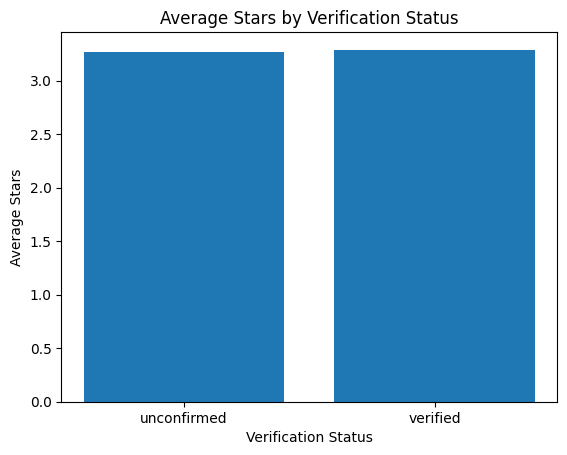

In [12]:

POS = 4.5
subset = df[["host_identity_verified","review rate number"]].dropna().copy()
subset["positive"] = subset["review rate number"] >= POS

res = (subset.groupby("host_identity_verified")
              .agg(count=("positive","size"),
                   positive_share=("positive","mean"),
                   avg_stars=("review rate number","mean"))
              .reset_index())
res["positive_share"] = (res["positive_share"]*100).round(2)
res["avg_stars"] = res["avg_stars"].round(2)
display(res)

plt.figure()
plt.bar(res["host_identity_verified"].astype(str), res["avg_stars"])
plt.title("Average Stars by Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Average Stars")
plt.show()


##  Price vs service fee (scatter)

Correlation: 1.0


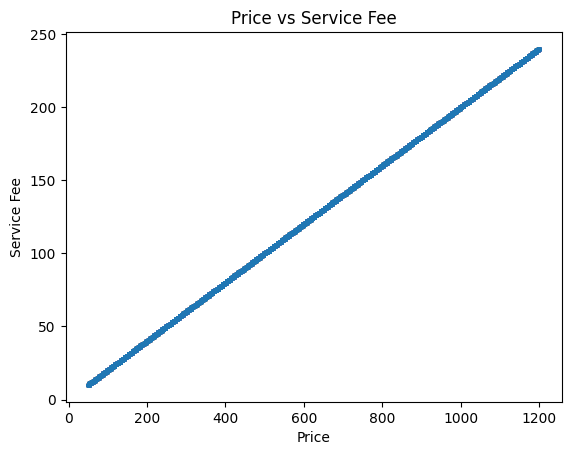

In [13]:

pf = df[["price","service fee"]].dropna()
print("Correlation:", round(pf["price"].corr(pf["service fee"]), 3))

plt.figure()
plt.scatter(pf["price"], pf["service fee"], s=5, alpha=0.3)
plt.title("Price vs Service Fee")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.show()


##  Average review stars by neighborhood group & room type (heatmap)

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                           3.35         NaN          3.33         3.26
Brooklyn                        3.25        3.75          3.26         3.34
Manhattan                       3.28        3.50          3.28         3.26
Queens                          3.35        3.75          3.32         3.38
Staten Island                   3.33         NaN          3.48         3.53


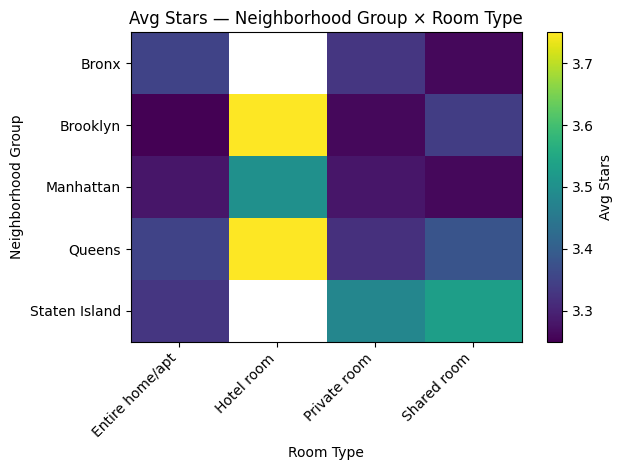

In [14]:

pivot = (df.pivot_table(index="neighbourhood group",
                        columns="room type",
                        values="review rate number",
                        aggfunc="mean")
           .round(2))

print(pivot)

plt.figure()
plt.imshow(pivot, aspect="auto")
plt.title("Avg Stars — Neighborhood Group × Room Type")
plt.xlabel("Room Type")
plt.ylabel("Neighborhood Group")
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha="right")
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label="Avg Stars")
plt.tight_layout()
plt.show()


##  Listings count vs availability (scatter)

Correlation: 0.159


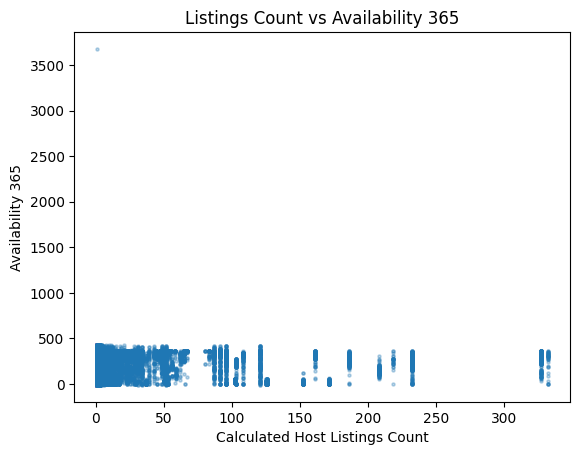

In [15]:

avail = df[["calculated host listings count","availability 365"]].dropna()
corr = avail["calculated host listings count"].corr(avail["availability 365"])
print("Correlation:", round(corr, 3))

plt.figure()
plt.scatter(avail["calculated host listings count"], avail["availability 365"], s=5, alpha=0.3)
plt.title("Listings Count vs Availability 365")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Availability 365")
plt.show()
